# Exploratory Data Analysis (EDA)¶

It is a set of procedures for examining the data

Summarizing the data with the help of descriptive and graphical tools.
Steps involved in EDA
Collecting the data

    Importing the data

        Pre processing

            Exploration

                Developing Insights

In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Import Data
cities = pd.read_csv("cities_r2.csv")

In [2]:
#to see some sample data
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
#Numbers of entries and number of features
cities.shape

(493, 22)

# Getting Data Summary and handling missing values

In [4]:
#data summary
cities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [5]:
#To see if we have any missing or null values in the data
cities.isna().any()

name_of_city                      False
state_code                        False
state_name                        False
dist_code                         False
population_total                  False
population_male                   False
population_female                 False
0-6_population_total              False
0-6_population_male               False
0-6_population_female             False
literates_total                   False
literates_male                    False
literates_female                  False
sex_ratio                         False
child_sex_ratio                   False
effective_literacy_rate_total     False
effective_literacy_rate_male      False
effective_literacy_rate_female    False
location                          False
total_graduates                   False
male_graduates                    False
female_graduates                  False
dtype: bool

In [6]:
#Grouping and ordering the data in descending order of population of the states
graduates_state = cities[['state_name','total_graduates','male_graduates','female_graduates','population_total']].groupby('state_name').sum().sort_values('population_total',ascending=False)

print(graduates_state)

                           total_graduates  male_graduates  female_graduates  \
state_name                                                                     
MAHARASHTRA                        5266151         2908234           2357917   
UTTAR PRADESH                      3692166         2090734           1601432   
ANDHRA PRADESH                     2751351         1668337           1083014   
WEST BENGAL                        2668776         1561629           1107147   
GUJARAT                            1994347         1130740            863607   
KARNATAKA                          2495820         1441274           1054546   
TAMIL NADU                         2144970         1182839            962131   
NCT OF DELHI                       2444280         1344320           1099960   
MADHYA PRADESH                     1592833          915594            677239   
RAJASTHAN                          1447819          863826            583993   
BIHAR                               8901

###### Observation: Maharashtra is the most populated state in India followed by Uttar Pradesh and Andhra Pradesh

# Bivariate Analysis using bar graph to see the number of graduates and total population of all states

<Figure size 1440x432 with 0 Axes>

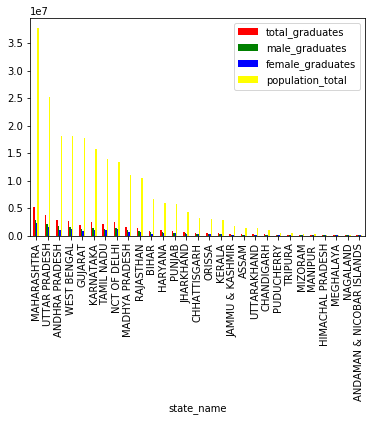

In [7]:
#Bar graph showing total graduates and total population of each state

colr = ['red','green','blue','yellow']
plt.figure(figsize=(20,6))
graduates_state.plot(kind='bar',color=colr)
plt.show()


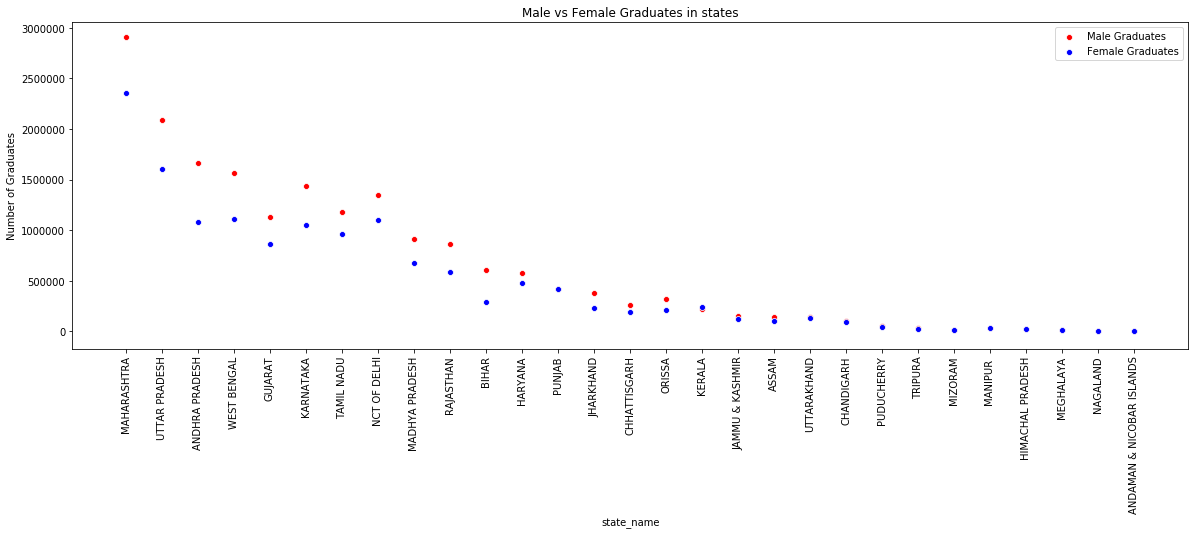

In [8]:
graduates_state=graduates_state.reset_index()
plt.figure(figsize=(20,6))
sns.scatterplot(x = 'state_name', y = 'male_graduates', data = graduates_state, color = 'red', label = 'Male Graduates')
sns.scatterplot(x = 'state_name', y = 'female_graduates', data = graduates_state, color = 'blue', label = 'Female Graduates')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('state_name')
plt.ylabel('Number of Graduates')
plt.title('Male vs Female Graduates in states')
plt.show()

###### Observation: 
Number of graduates are Less than 50% of the total population for most of the states. Mizoram, Manipur, Himachal Pradesh, Meghalaya, Nagaland and Anadaman & Nicobar Islands seems to high grduation rate.
Only Kerala has more number of female graduates than male graduates.


# Box plot

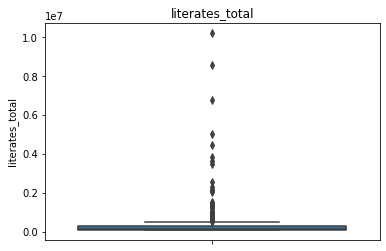

In [9]:
sns.boxplot(y=cities["literates_total"])
plt.title("literates_total")
plt.show()

# Five Number Summary of total literates in the country

In [10]:
five_number_summary = cities.literates_total.describe()
five_number_summary

count    4.930000e+02
mean     3.461527e+05
std      8.220952e+05
min      5.699800e+04
25%      9.768700e+04
50%      1.413290e+05
75%      2.679000e+05
max      1.023759e+07
Name: literates_total, dtype: float64

# Ratio of graduates to total population of states plotted using scatter plot

In [11]:
graduates_state['rate']=graduates_state['total_graduates']/graduates_state['population_total']

In [12]:
graduates_state.sort_values('rate',ascending=False)


,state_name,total_graduates,male_graduates,female_graduates,population_total,rate
25,HIMACHAL PRADESH,43353,23822,19531,169758,0.255381
24,MANIPUR,63915,33950,29965,264986,0.241201
19,UTTARAKHAND,274508,144201,130307,1340397,0.204796
20,CHANDIGARH,189312,101491,87821,960787,0.197038
7,NCT OF DELHI,2444280,1344320,1099960,13481997,0.181300
11,HARYANA,1059274,577921,481353,5952223,0.177963
15,ORISSA,530145,321969,208176,3003234,0.176525
26,MEGHALAYA,25113,12466,12647,143007,0.175607
18,ASSAM,242490,140832,101658,1391154,0.174309
16,KERALA,460401,215434,244967,2755973,0.167056


In [13]:

graduates_state=graduates_state.reset_index()


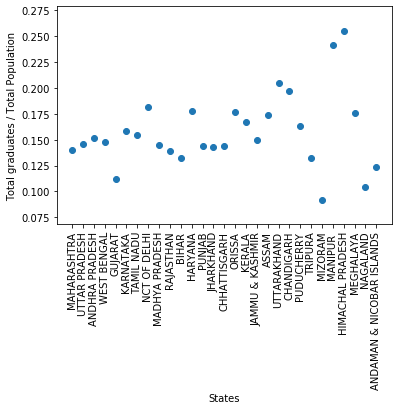

In [14]:
#Total graduates as per the population in each state

plt.scatter(x=graduates_state['state_name'],y=graduates_state['rate'])
plt.xlabel('States')
plt.ylabel('Total graduates / Total Population')

plt.xticks(rotation=90)
plt.show()

# States in decreasing order of Average literacy rates

In [15]:

literacy_rate = cities[['state_name','effective_literacy_rate_total','effective_literacy_rate_male','effective_literacy_rate_female']].groupby('state_name').mean().sort_values('effective_literacy_rate_total',ascending=False)
literacy_rate=literacy_rate.reset_index()
print(literacy_rate)

                   state_name  effective_literacy_rate_total  \
0                     MIZORAM                      98.800000   
1                      KERALA                      95.444286   
2            HIMACHAL PRADESH                      94.670000   
3                     TRIPURA                      93.880000   
4                   MEGHALAYA                      92.340000   
5                    MANIPUR                       91.700000   
6                       ASSAM                      91.512500   
7                  TAMIL NADU                      90.093125   
8                 MAHARASHTRA                      89.827907   
9   ANDAMAN & NICOBAR ISLANDS                      89.760000   
10                 PUDUCHERRY                      89.745000   
11                     ORISSA                      88.301000   
12                WEST BENGAL                      87.890328   
13                   NAGALAND                      87.480000   
14                    GUJARAT           

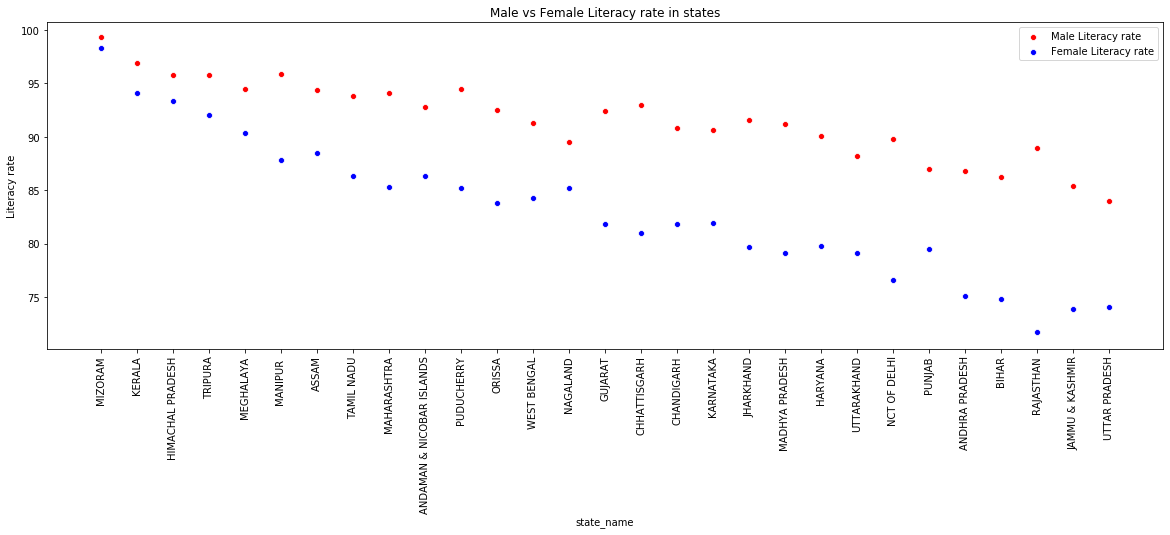

In [16]:
#Male vs Female Literacy rate in states
plt.figure(figsize=(20,6))
sns.scatterplot(x = 'state_name', y = 'effective_literacy_rate_male', data = literacy_rate, color = 'red', label = 'Male Literacy rate')
sns.scatterplot(x = 'state_name', y = 'effective_literacy_rate_female', data = literacy_rate, color = 'blue', label = 'Female Literacy rate')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('state_name')
plt.ylabel('Literacy rate')
plt.title('Male vs Female Literacy rate in states')
plt.show()

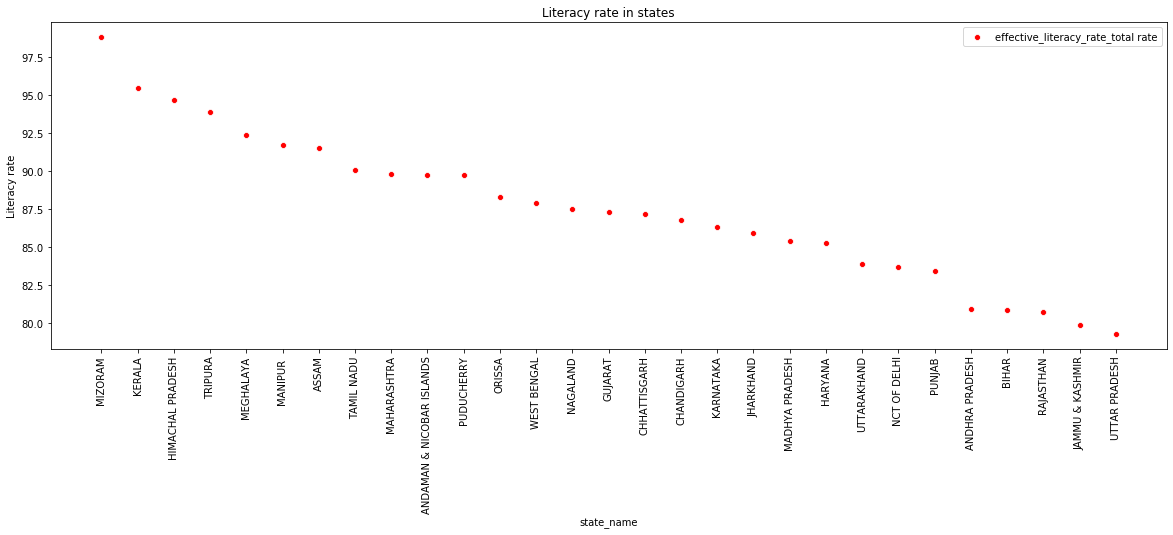

In [17]:
plt.figure(figsize=(20,6))
sns.scatterplot(x = 'state_name', y = 'effective_literacy_rate_total', data = literacy_rate, color = 'red', label = 'effective_literacy_rate_total rate')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('state_name')
plt.ylabel('Literacy rate')
plt.title('Literacy rate in states')
plt.show()


###### Observation:
    Male Literacy rate is higher than Female for all the states.
    Mizoram has the highest Literacy rate with quite less difference in the male and female literacy rates. 
    Uttar Pradesh has the least literacy rate.
    Female literacy rate is the least in Rajasthan

# Data Subset

In [18]:
#Lets view the data for most populated state
maharashtra=cities.loc[cities['state_name']=='MAHARASHTRA']

In [19]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    43 non-null     object 
 1   state_code                      43 non-null     int64  
 2   state_name                      43 non-null     object 
 3   dist_code                       43 non-null     int64  
 4   population_total                43 non-null     int64  
 5   population_male                 43 non-null     int64  
 6   population_female               43 non-null     int64  
 7   0-6_population_total            43 non-null     int64  
 8   0-6_population_male             43 non-null     int64  
 9   0-6_population_female           43 non-null     int64  
 10  literates_total                 43 non-null     int64  
 11  literates_male                  43 non-null     int64  
 12  literates_female                43 no

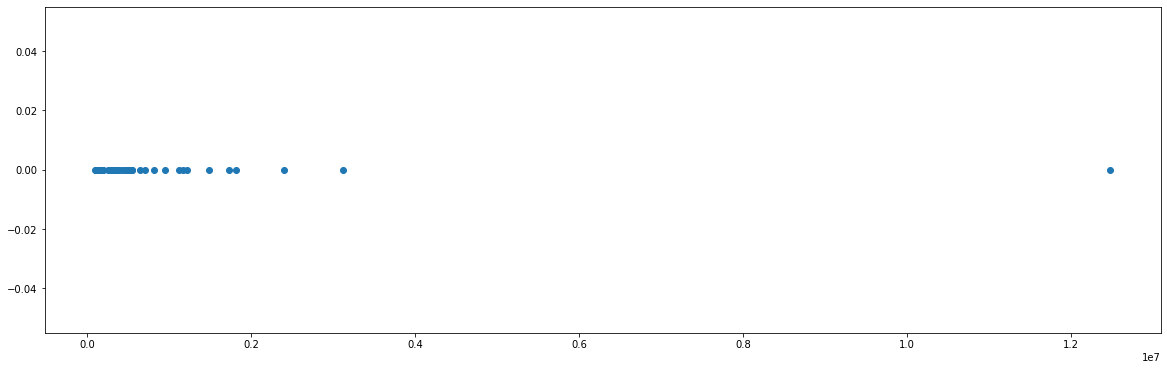

In [20]:
plt.figure(figsize=(20,6))

plt.plot(maharashtra["population_total"], np.zeros_like(maharashtra['population_total']), 'o')

# Population Bar chart for different cities in the most populated state

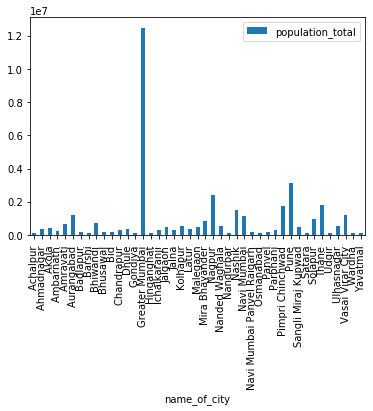

In [21]:
#Total Population in different cities of Maharashtra state
maharashtra.plot(kind='bar',x='name_of_city',y='population_total')

###### Observation: 
    Mumbai is the most populated city in Maharashtra with Pune and Nagpur next in the line

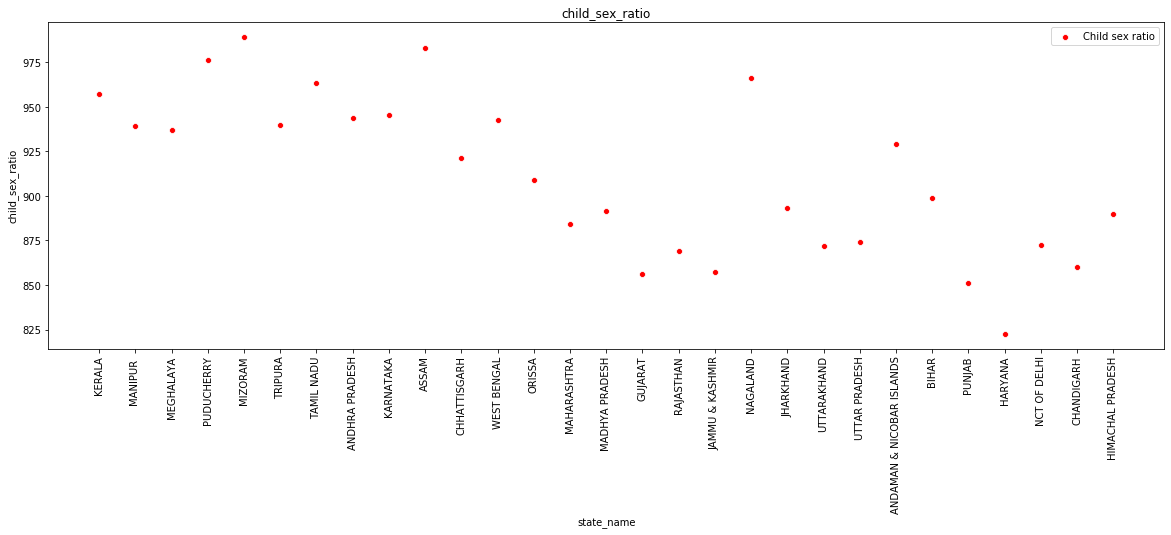

In [22]:
sex_ratio = cities[['state_name','sex_ratio','child_sex_ratio']].groupby('state_name').mean().sort_values('sex_ratio',ascending=False)

sex_ratio['diff']=sex_ratio['child_sex_ratio']-sex_ratio['sex_ratio']
sex_ratio=sex_ratio.reset_index()
plt.figure(figsize=(20,6))

sns.scatterplot(x = 'state_name', y = 'child_sex_ratio', data = sex_ratio, color = 'red', label = 'Child sex ratio')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('state_name')
plt.ylabel('child_sex_ratio')
plt.title('child_sex_ratio')
plt.show()





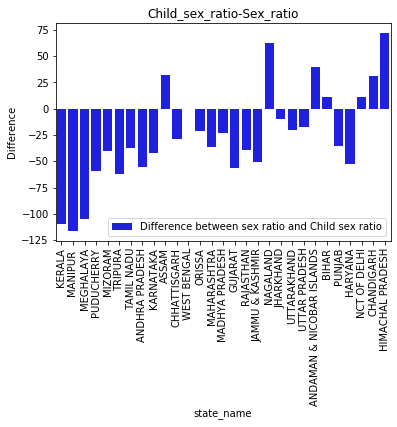

In [23]:
sns.barplot(x = 'state_name', y = 'diff', data = sex_ratio, color = 'blue', label = 'Difference between sex ratio and Child sex ratio')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('state_name')
plt.ylabel('Difference')
plt.title('Child_sex_ratio-Sex_ratio')
plt.show()

###### Observation:
    Mizoram and Assam seem to have highest Child Sex Ratio.
    Child sex ratio and Sex ratio has postive relation. 
    Few states seem to have less sex ratio although the child sex ratio is more.
